# Supervised Learning: Classification Algorithms Introduction

In this practical assignment, we will explore supervised learning, focusing on classification problems. We'll apply different learning algorithms, compare their performance using evaluation metrics, and analyze the time spent to train and test the models.

Key steps include:
1. Dataset analysis and pre-processing.
3. Defining training and test sets.
4. Selecting and parameterizing learning algorithms, choosing at least three from Decision Trees, Neural Networks, K-NN, SVM, etc.
5. Evaluating the learning process on the test set.

We'll use pandas to pre-process the dataset, scikit-learn for implementing algorithms, and seaborn for visualization.

## Dataset

We'll use the [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) from the UCI Machine Learning Repository.

From the dataset description:
> The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

As presented in the slides, we will try to answer some questions:
* Will a particular session lead to a purchase?
* Which features are most/least indicative of a purchase?
* What users are more/less likely to purchase?


## Pre-processing

We'll start by loading the dataset `online_shoppers_intention.csv` using pandas.

In [197]:
import pandas

data = pandas.read_csv('online_shoppers_intention.csv')

# check if there are any null values
print("Any null values? ", data.isnull().values.any())

# check if there are any missing values
print("Any missing values? ", data.isna().values.any())

data.head()

Any null values?  False
Any missing values?  False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [198]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Let's try to plot some of the features to get a better understanding of the dataset.

As previously mentioned, we'll use seaborn for visualization. We'll start with a simple correlation bar plot with the target variable `Revenue`.

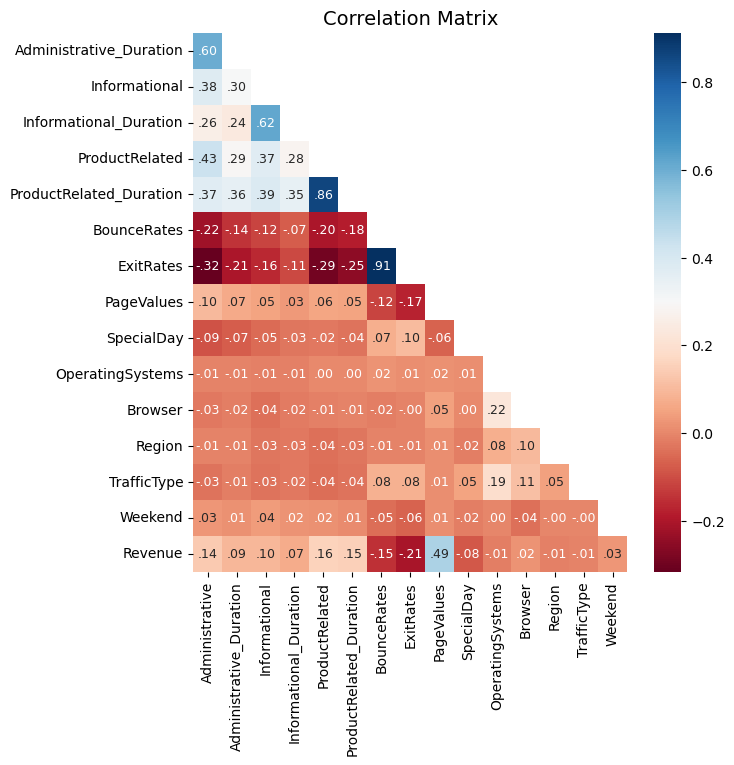

In [199]:
import seaborn
import numpy as np

%matplotlib inline

def plot_correlation_matrix(data):
    corr_matrix = data.corr(numeric_only=True)

    # drop first row and last column
    corr_matrix = corr_matrix.iloc[1:, :-1]

    # only show the lower triangle of the matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1) # k=1 to remove the diagonal

    # this is just to make the numbers more compact by removing the leading zeros
    annot = np.array([['' if m else f"{corr_matrix.iloc[i, j]:.2f}".lstrip('0').replace('-0','-') for j, m in enumerate(row)] for i, row in enumerate(mask)])

    hm = seaborn.heatmap(corr_matrix, mask=mask, cmap='RdBu', annot=annot, fmt='', annot_kws={'size': 9})
    hm.figure.set_size_inches(7, 7)
    hm.set_title('Correlation Matrix', fontsize=14)

plot_correlation_matrix(data)

As we can see, `Revenue` is mostly correlated with `PageValues` and `ProductRelated` features, it is also very negatively correlated with `BounceRates` and `ExitRates`, which is to be expected.

In fact, we can see that `BounceRates` and `ExitRates` are highly correlated, so we can drop one of them. We'll drop `BounceRates` since it is more negatively correlated with `Revenue`.

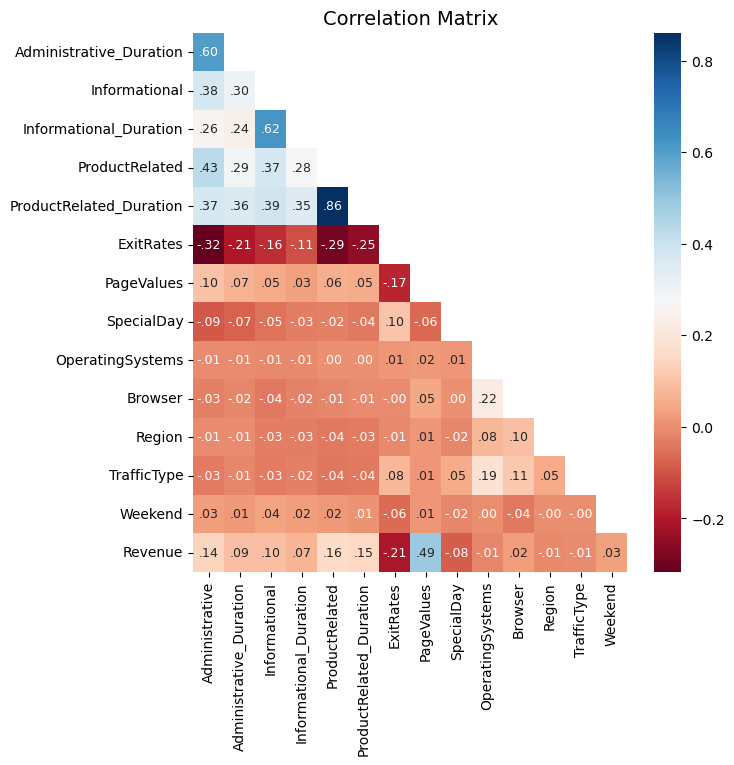

In [200]:
data_filtered = data.drop(columns=['BounceRates'])

# check correlation matrix again
plot_correlation_matrix(data_filtered)

Before we start training our models, we'll need to convert the categorical features to numerical values.

In [201]:
# check if there are any invalid month values
print(data_filtered['Month'].unique())

# convert `June` to `Jun` otherwise pandas will not be able to convert it to a numeric value
data_filtered['Month'] = data_filtered['Month'].replace('June', 'Jun')

# convert `Month` to a numeric value
data_filtered['Month'] = pandas.to_datetime(data_filtered['Month'], format='%b').dt.month

# convert `VisitorType` to a numeric value 
data_filtered['VisitorType'] = pandas.Categorical(data_filtered['VisitorType']).codes
print(data_filtered['VisitorType'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
[2 0 1]


In [202]:
data_filtered['Revenue'].value_counts()

# After preprocessing, we have X(features) and y(target) variables
X = data_filtered.drop(columns=['Revenue'])
y = data_filtered['Revenue']

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import f1_score

def grid_search(model: BaseEstimator, params, X, y):
    grid = GridSearchCV(model, params, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)


    print('Fitting ', model.__class__.__name__, '...')
    grid.fit(X, y)

    print("Best score: ", grid.best_score_)
    print("Best params: ", grid.best_params_)
    print("F1 score: ", f1_score(y_test, grid.predict(X_test)))
    print()

    return grid

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# check the shape of X and y
print(X_train.shape)
print(y_train.shape)

# print('X_train head:')
# print(X_train.head())

# print('y_train head:')
# print(y_train.head())


(9864, 16)
(9864,)


Now we will start training our models. We'll use `GridSearchCV` to find the best parameters for each algorithm. We'll use 5-fold cross-validation to evaluate the performance of each algorithm.

In [204]:
from sklearn.tree import DecisionTreeClassifier

def train_desicion_tree(X_train, y_train):
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 4, 6, 8, 10],
        # 'min_samples_split': [2, 4, 6, 8, 10],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': [None, 'sqrt', 'log2']
    }

    grid = grid_search(DecisionTreeClassifier(), params, X_train, y_train)
    return grid

decision_tree_grid = train_desicion_tree(X_train, y_train)

Fitting  DecisionTreeClassifier ...
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best score:  0.8947680906551909
Best params:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': None}
F1 score:  0.6710478276743336



K-Nearest Neighbors:

In [205]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, y_train):
    params = {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10, 20, 30],
        'p': [1, 2]
    }

    grid = grid_search(KNeighborsClassifier(), params, X_train, y_train)
    return grid

knn_grid = train_knn(X_train, y_train)

Fitting  KNeighborsClassifier ...
Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Best score:  0.8691195480393183
Best params:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
F1 score:  0.44379276637341153



Support Vector Machines:

In [206]:
from sklearn.svm import SVC

def train_svm(X_train, y_train):
    params = {
        'C': [0.1, 1],
        # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [1, 2],
        'gamma': ['scale', 'auto']
    }

    grid = grid_search(SVC(), params, X_train, y_train)
    return grid

svm_grid = train_svm(X_train, y_train)

Fitting  SVC ...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score:  0.8507706677682079
Best params:  {'C': 1, 'degree': 1, 'gamma': 'scale'}
F1 score:  0.030443414956982127



In [207]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, y_train):
    params = {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy'],
        # 'max_depth': [None, 2, 4, 6, 8, 10],
        # 'min_samples_split': [2, 4, 6, 8, 10],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        # 'max_features': [None, 'sqrt', 'log2']
    }

    grid = grid_search(RandomForestClassifier(), params, X_train, y_train)
    return grid

random_forest_grid = train_random_forest(X_train, y_train)

Fitting  RandomForestClassifier ...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score:  0.9045002887435238
Best params:  {'criterion': 'entropy', 'n_estimators': 200}
F1 score:  1.0



In [208]:
# Neural Network
from sklearn.neural_network import MLPClassifier

def train_mlp(X_train, y_train):
    params = {
        'hidden_layer_sizes': [(100,), (100, 100)],
        # 'activation': ['identity', 'logistic', 'tanh', 'relu'],
        # 'solver': ['lbfgs', 'sgd', 'adam'],
        # 'alpha': [0.0001, 0.001, 0.01, 0.1],
        # 'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'max_iter': [100, 200, 300, 400, 500]
    }

    grid = grid_search(MLPClassifier(), params, X_train, y_train)

    return grid

mlp_grid = train_mlp(X_train, y_train)

Fitting  MLPClassifier ...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best score:  0.8785506719195382
Best params:  {'hidden_layer_sizes': (100, 100), 'max_iter': 400}
F1 score:  0.6138666666666667



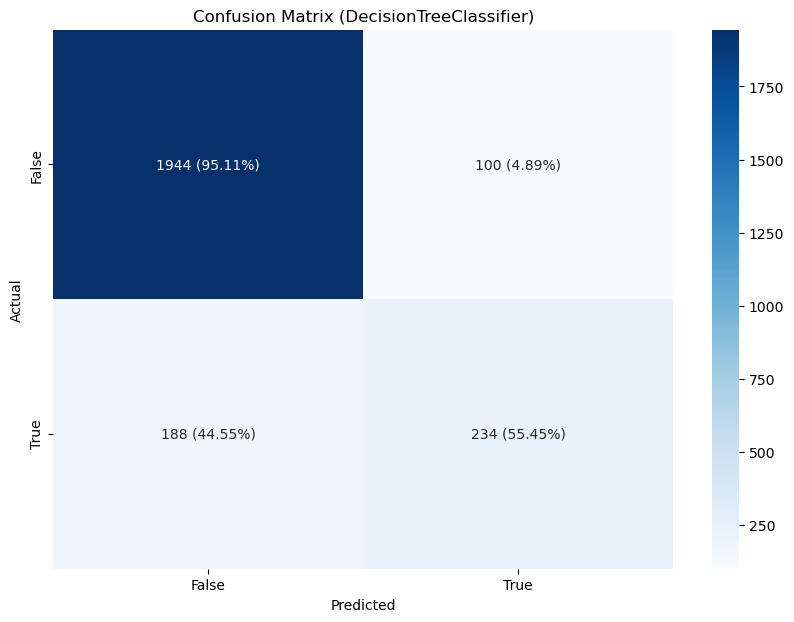

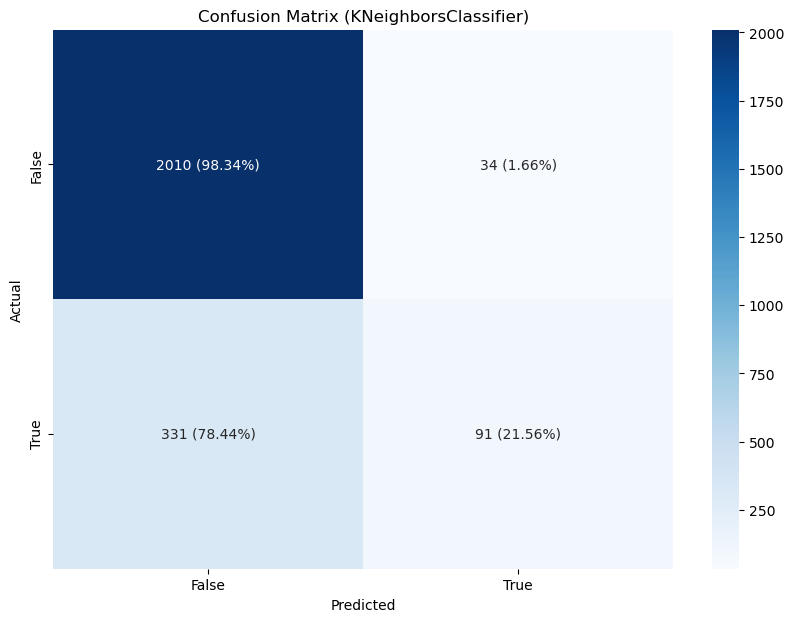

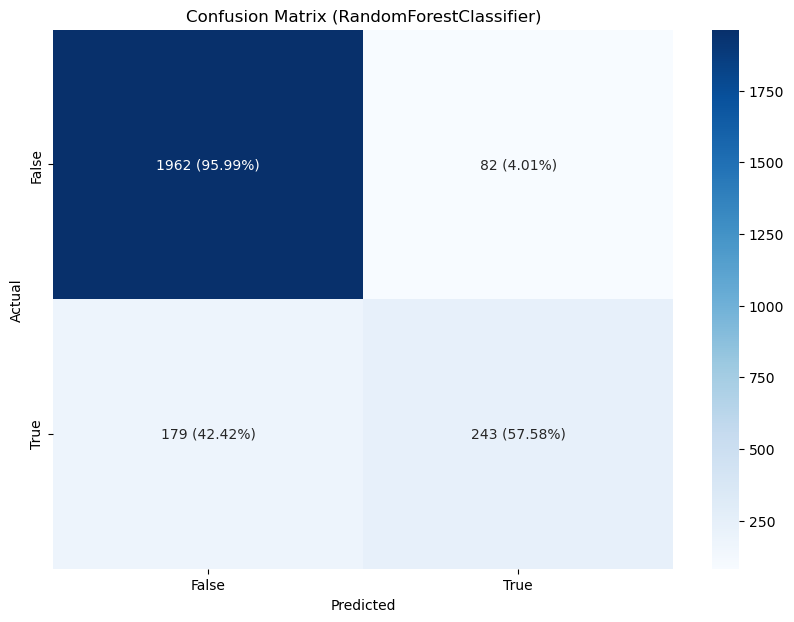

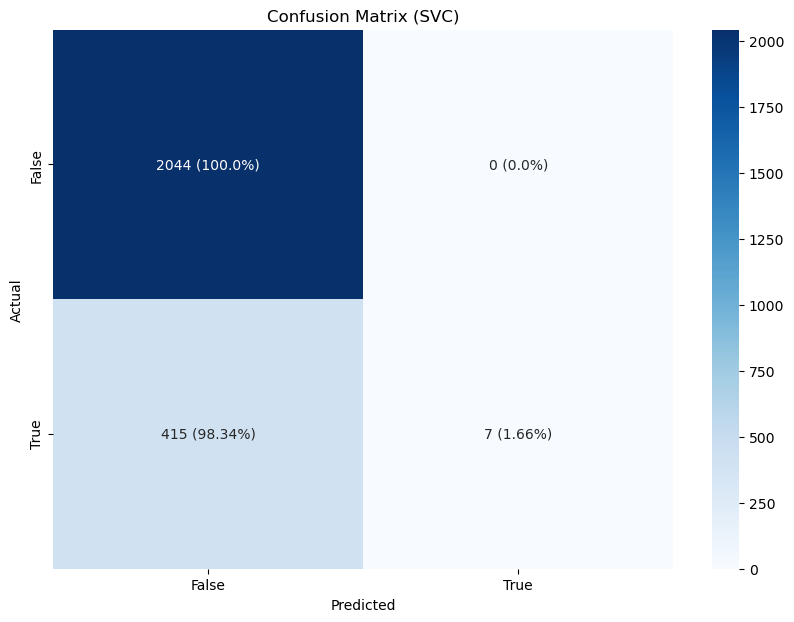

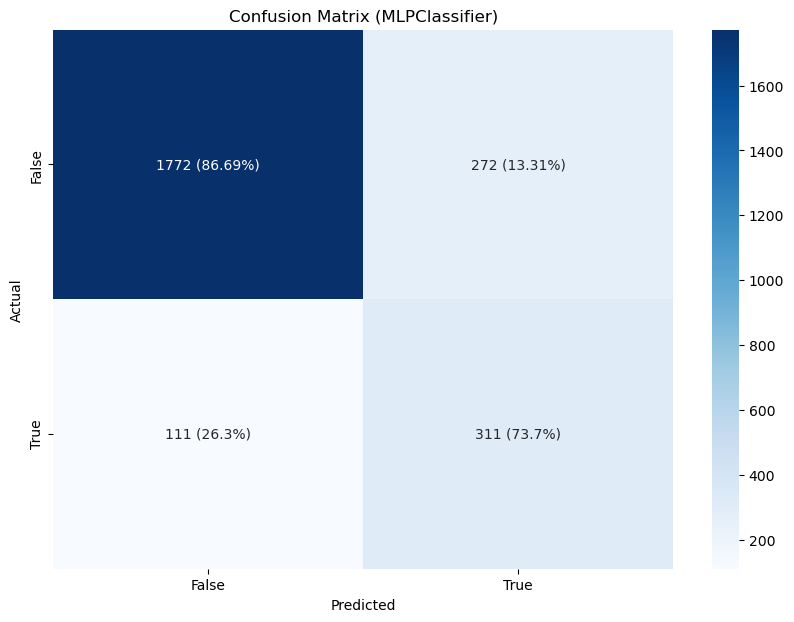

In [209]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(grid: GridSearchCV, X, y):
    y_pred = grid.predict(X)
    cm = confusion_matrix(y, y_pred)
    # cm = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=grid.classes_)
    # set title

    # Calculate the percentages of each count in the confusion matrix
    cm_percentages = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_percentages = np.round(cm_percentages * 100, 2)

    # Combine the count and percentage in a single matrix
    cm_combined = np.empty((cm.shape[0], cm.shape[1]), dtype=object)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            cm_combined[i, j] = f"{cm[i, j]} ({cm_percentages[i, j]}%)"
    
    # plot the confusion matrix
    plt.figure(figsize=(10, 7))
    seaborn.heatmap(cm, annot=cm_combined, xticklabels=grid.classes_, yticklabels=grid.classes_, cmap='Blues', fmt='')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({grid.best_estimator_.__class__.__name__})')
    plt.show()
    


plot_confusion_matrix(decision_tree_grid, X_test, y_test)
plot_confusion_matrix(knn_grid, X_test, y_test)
plot_confusion_matrix(random_forest_grid, X_test, y_test)
plot_confusion_matrix(svm_grid, X_test, y_test)
plot_confusion_matrix(mlp_grid, X_test, y_test)

Not looking good. The models are good at predicting the negative class, but not so good at predicting the positive class. This is probably due to the class imbalance in the dataset.

Let's try to fix this by downsampling the negative class.

In [216]:
from sklearn.utils import resample

# downsample the majority class
X_majority = X[y == False]
X_minority = X[y == True]

X_majority_downsampled = resample(
    X_majority, replace=False, n_samples=X_minority.shape[0], random_state=0)

X_downsampled = pandas.concat([X_majority_downsampled, X_minority])
y_downsampled = y[X_downsampled.index]

# check if the classes are balanced
print(y_downsampled.value_counts())

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=0)

# check the shape of X and y
print(X_train.shape)
print(y_train.shape)


False    1908
True     1908
Name: Revenue, dtype: int64
(3052, 16)
(3052,)


Now let's try to train the models again.

Fitting  DecisionTreeClassifier ...
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best score:  0.8476545590913961
Best params:  {'criterion': 'gini', 'max_depth': 2, 'max_features': None}
F1 score:  0.8198074277854195

Fitting  KNeighborsClassifier ...
Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Best score:  0.7378838529947498
Best params:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
F1 score:  0.7272727272727273

Fitting  RandomForestClassifier ...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score:  0.8496207007393121
Best params:  {'criterion': 'entropy', 'n_estimators': 100}
F1 score:  0.8359375

Fitting  MLPClassifier ...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best score:  0.7781774349083895
Best params:  {'hidden_layer_sizes': (100,), 'max_iter': 300}
F1 score:  0.7463126843657818



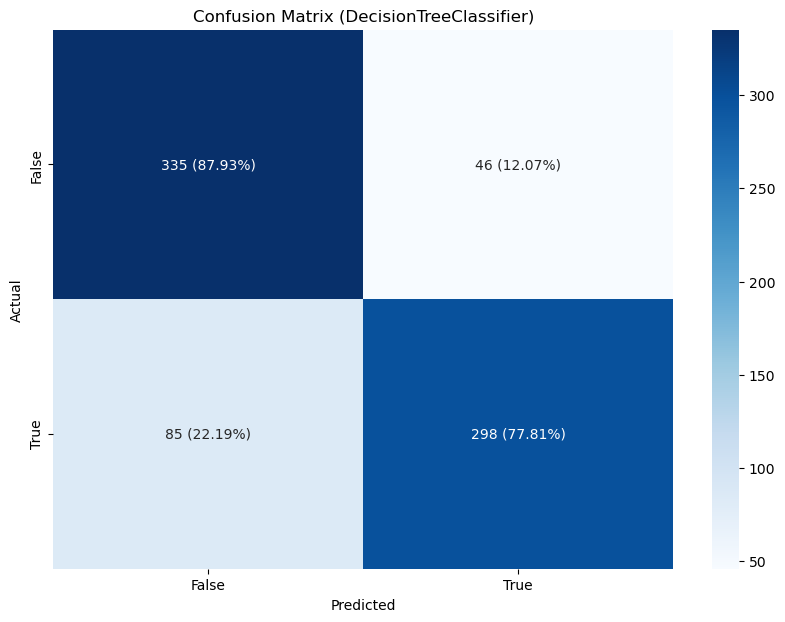

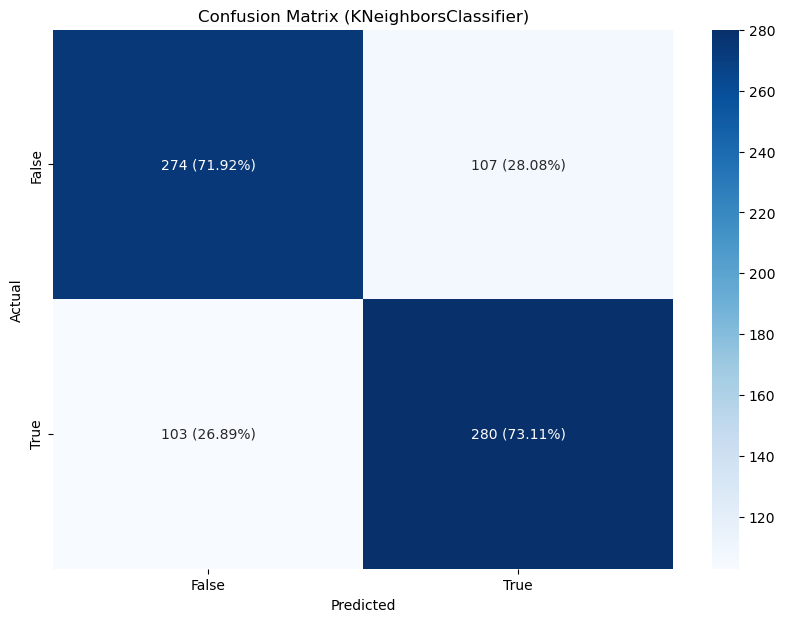

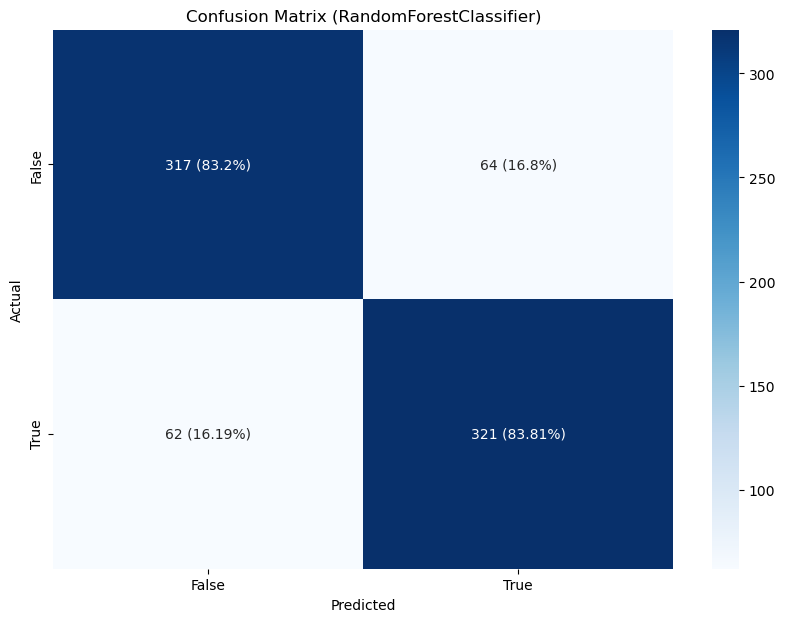

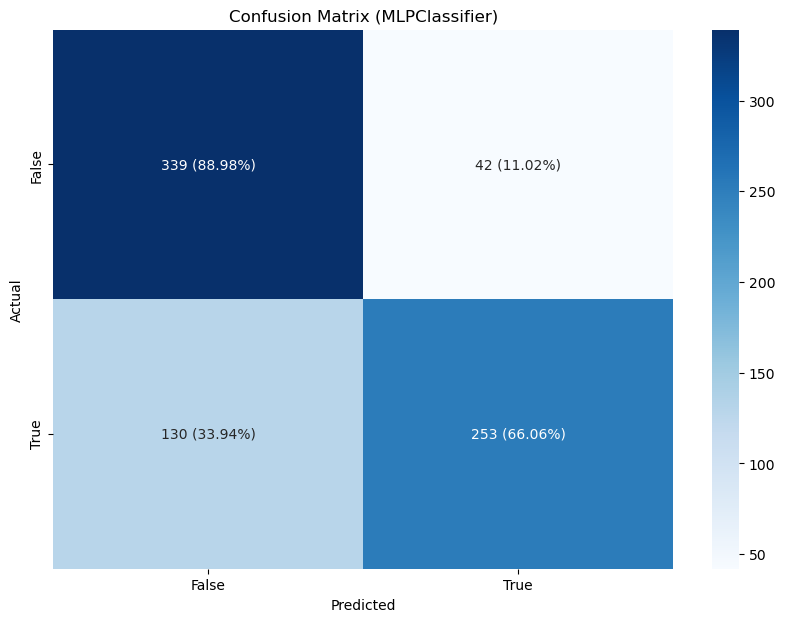

In [217]:
decision_tree_grid = train_desicion_tree(X_train, y_train)
knn_grid = train_knn(X_train, y_train)
# svm_grid = train_svm(X_train, y_train)
random_forest_grid = train_random_forest(X_train, y_train)
mlp_grid = train_mlp(X_train, y_train)

plot_confusion_matrix(decision_tree_grid, X_test, y_test)
plot_confusion_matrix(knn_grid, X_test, y_test)
# plot_confusion_matrix(svm_grid, X_test, y_test)
plot_confusion_matrix(random_forest_grid, X_test, y_test)
plot_confusion_matrix(mlp_grid, X_test, y_test)


As we can see, there was a significant improvement in the performance of the models.

Random Decision Forests seem to be the best model for this dataset, with a F1-score of `0.83` (on the downsampled test set).